<a href="https://colab.research.google.com/github/RAFAA-star/Analyse-Pr-dictive-du-Phasage-entre-la-Consommation-et-la-Production-Energ-tique-en-France-/blob/main/Analyse_complete_des_s%C3%A9quences_align%C3%A9es_et_de_d%C3%A9tection_de_mutations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pour effectuer une analyse complète sur l'exemple de séquences alignées et de détection de mutations, nous allons procéder comme suit :

* Charger et simuler des séquences alignées.
* Charger et simuler une séquence de référence.
* Détecter les mutations en comparant les séquences alignées à la séquence de référence.
* Annoter les mutations détectées en les comparant à une base de données d'annotations.
* Visualiser les résultats pour mieux comprendre l'impact des mutations.
# 1. Charger et Simuler des Séquences Alignées
Nous simulons des séquences alignées pour l'analyse.

In [1]:
import pandas as pd

# Simuler les séquences alignées (séquences fictives)
sequences = [
    {"id": "seq1", "chromosome": "chr1", "start": 100, "seq": "ATGCGTACGTAGCTAGCTAG"},
    {"id": "seq2", "chromosome": "chr1", "start": 120, "seq": "CGTAGCTAGCTGACTGATCG"},
    {"id": "seq3", "chromosome": "chr2", "start": 200, "seq": "TGCATGCATGCGTAGCTAGC"}
]

# Convertir en DataFrame
sequences_df = pd.DataFrame(sequences)
print("Séquences alignées:")
print(sequences_df)


Séquences alignées:
     id chromosome  start                   seq
0  seq1       chr1    100  ATGCGTACGTAGCTAGCTAG
1  seq2       chr1    120  CGTAGCTAGCTGACTGATCG
2  seq3       chr2    200  TGCATGCATGCGTAGCTAGC


# 2. Charger et Simuler la Séquence de Référence
Nous créons une séquence de référence pour chaque chromosome.

In [2]:
# Simuler la séquence de référence (séquences fictives)
reference = {
    "chr1": "A" * 100 + "ATGCGTACGTAGCTAGCTAGCTAGCTGACTGATCGTAGCTGACTGC" + "T" * 100,
    "chr2": "G" * 200 + "TGCATGCATGCGTAGCTAGCTAGCTGATCGTACGTAGCTGATCGT" + "C" * 100
}

# Afficher la séquence de référence
print("\nSéquence de référence pour chr1:", reference["chr1"][90:130])
print("Séquence de référence pour chr2:", reference["chr2"][190:230])



Séquence de référence pour chr1: AAAAAAAAAAATGCGTACGTAGCTAGCTAGCTAGCTGACT
Séquence de référence pour chr2: GGGGGGGGGGTGCATGCATGCGTAGCTAGCTAGCTGATCG


# 3. Détecter les Mutations
Nous comparons les séquences alignées avec la séquence de référence pour détecter les mutations.

In [3]:
# Liste pour stocker les mutations détectées
mutations = []

# Détecter les mutations
for seq in sequences:
    ref_seq = reference[seq["chromosome"]][seq["start"]:seq["start"] + len(seq["seq"])]
    for i, (base_read, base_ref) in enumerate(zip(seq["seq"], ref_seq)):
        if base_read != base_ref:
            mutations.append({
                "chromosome": seq["chromosome"],
                "position": seq["start"] + i,
                "reference_base": base_ref,
                "observed_base": base_read
            })

# Créer un DataFrame à partir des mutations détectées
mutations_df = pd.DataFrame(mutations)

# Afficher les mutations détectées
print("\nMutations détectées:")
print(mutations_df)



Mutations détectées:
   chromosome  position reference_base observed_base
0        chr1       121              T             G
1        chr1       122              A             T
2        chr1       123              G             A
3        chr1       124              C             G
4        chr1       125              T             C
5        chr1       126              G             T
6        chr1       128              C             G
7        chr1       129              T             C
8        chr1       130              G             T
9        chr1       131              A             G
10       chr1       132              T             A
11       chr1       134              G             T
12       chr1       135              T             G
13       chr1       137              G             T
14       chr1       139              T             G


# 4. Annoter les Mutations
Nous annotons les mutations détectées en les comparant à une base de données fictive d'annotations.

In [4]:
# Exemple de base de données d'annotations de mutations
annotations = [
    {"chromosome": "chr1", "position": 105, "mutation": "A>T", "disease": "Example Disease 1"},
    {"chromosome": "chr1", "position": 124, "mutation": "G>C", "disease": "Example Disease 2"},
    {"chromosome": "chr2", "position": 202, "mutation": "G>A", "disease": "Example Disease 3"}
]

annotations_df = pd.DataFrame(annotations)

# Fusionner les mutations détectées avec les annotations pour identifier les mutations associées à des maladies
annotated_mutations = pd.merge(mutations_df, annotations_df, how="left", on=["chromosome", "position"])

# Afficher les mutations annotées
print("\nMutations annotées:")
print(annotated_mutations)



Mutations annotées:
   chromosome  position reference_base observed_base mutation  \
0        chr1       121              T             G      NaN   
1        chr1       122              A             T      NaN   
2        chr1       123              G             A      NaN   
3        chr1       124              C             G      G>C   
4        chr1       125              T             C      NaN   
5        chr1       126              G             T      NaN   
6        chr1       128              C             G      NaN   
7        chr1       129              T             C      NaN   
8        chr1       130              G             T      NaN   
9        chr1       131              A             G      NaN   
10       chr1       132              T             A      NaN   
11       chr1       134              G             T      NaN   
12       chr1       135              T             G      NaN   
13       chr1       137              G             T      NaN   
14  

# 5. Visualiser les Résultats
Pour visualiser les résultats, nous pouvons utiliser des bibliothèques de visualisation comme matplotlib ou seaborn.

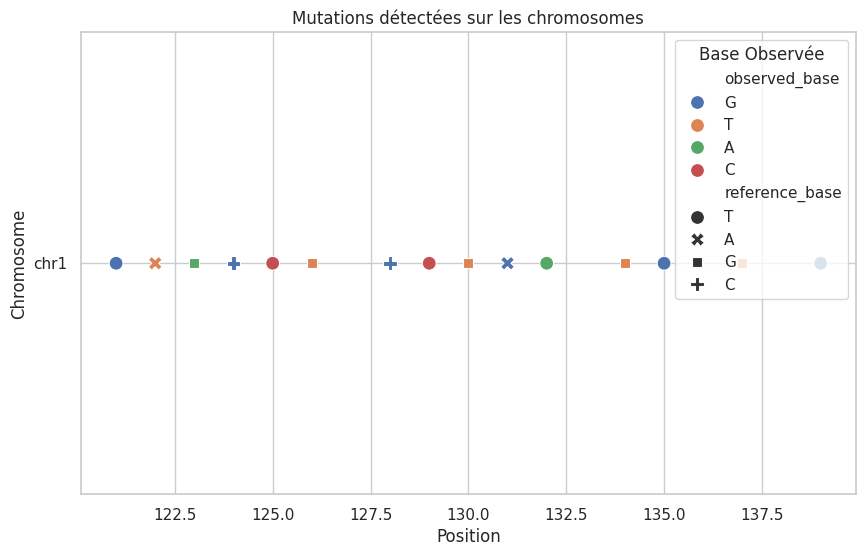

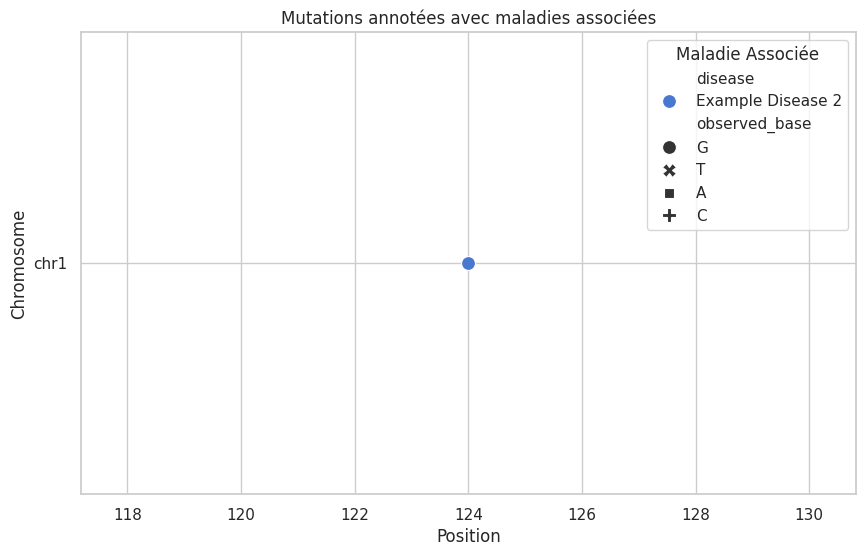

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer les visualisations
sns.set(style="whitegrid")

# Visualiser les mutations détectées
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mutations_df, x="position", y="chromosome", hue="observed_base", style="reference_base", s=100, palette="deep")
plt.title("Mutations détectées sur les chromosomes")
plt.xlabel("Position")
plt.ylabel("Chromosome")
plt.legend(title="Base Observée")
plt.show()

# Visualiser les mutations annotées
plt.figure(figsize=(10, 6))
sns.scatterplot(data=annotated_mutations, x="position", y="chromosome", hue="disease", style="observed_base", s=100, palette="muted")
plt.title("Mutations annotées avec maladies associées")
plt.xlabel("Position")
plt.ylabel("Chromosome")
plt.legend(title="Maladie Associée")
plt.show()


# Code Complet

Séquences alignées:
     id chromosome  start                   seq
0  seq1       chr1    100  ATGCGTACGTAGCTAGCTAG
1  seq2       chr1    120  CGTAGCTAGCTGACTGATCG
2  seq3       chr2    200  TGCATGCATGCGTAGCTAGC

Séquence de référence pour chr1: AAAAAAAAAAATGCGTACGTAGCTAGCTAGCTAGCTGACT
Séquence de référence pour chr2: GGGGGGGGGGTGCATGCATGCGTAGCTAGCTAGCTGATCG

Mutations détectées:
   chromosome  position reference_base observed_base
0        chr1       121              T             G
1        chr1       122              A             T
2        chr1       123              G             A
3        chr1       124              C             G
4        chr1       125              T             C
5        chr1       126              G             T
6        chr1       128              C             G
7        chr1       129              T             C
8        chr1       130              G             T
9        chr1       131              A             G
10       chr1       132           

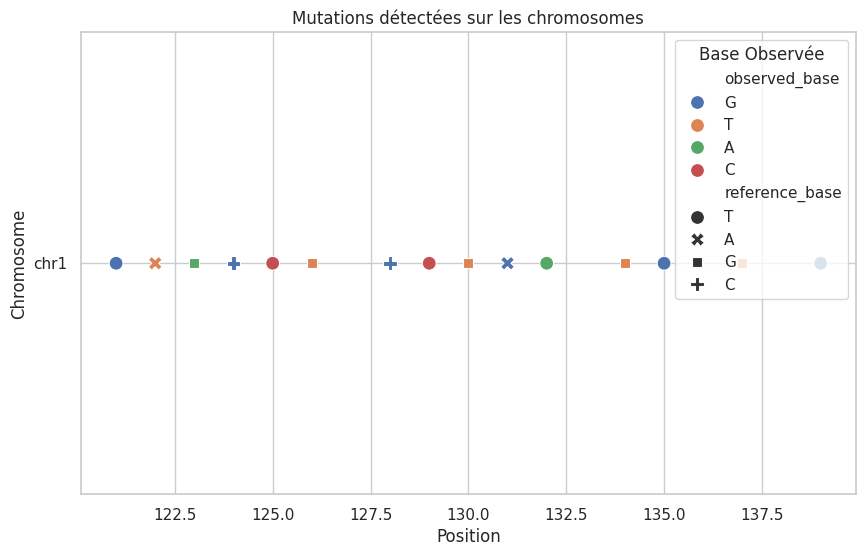

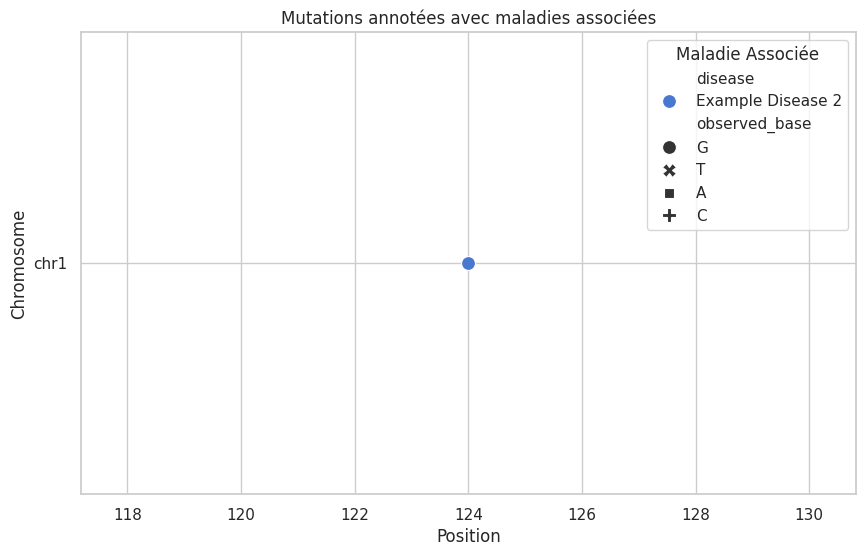

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simuler les séquences alignées (séquences fictives)
sequences = [
    {"id": "seq1", "chromosome": "chr1", "start": 100, "seq": "ATGCGTACGTAGCTAGCTAG"},
    {"id": "seq2", "chromosome": "chr1", "start": 120, "seq": "CGTAGCTAGCTGACTGATCG"},
    {"id": "seq3", "chromosome": "chr2", "start": 200, "seq": "TGCATGCATGCGTAGCTAGC"}
]
sequences_df = pd.DataFrame(sequences)
print("Séquences alignées:")
print(sequences_df)

# Simuler la séquence de référence (séquences fictives)
reference = {
    "chr1": "A" * 100 + "ATGCGTACGTAGCTAGCTAGCTAGCTGACTGATCGTAGCTGACTGC" + "T" * 100,
    "chr2": "G" * 200 + "TGCATGCATGCGTAGCTAGCTAGCTGATCGTACGTAGCTGATCGT" + "C" * 100
}
print("\nSéquence de référence pour chr1:", reference["chr1"][90:130])
print("Séquence de référence pour chr2:", reference["chr2"][190:230])

# Détecter les mutations
mutations = []
for seq in sequences:
    ref_seq = reference[seq["chromosome"]][seq["start"]:seq["start"] + len(seq["seq"])]
    for i, (base_read, base_ref) in enumerate(zip(seq["seq"], ref_seq)):
        if base_read != base_ref:
            mutations.append({
                "chromosome": seq["chromosome"],
                "position": seq["start"] + i,
                "reference_base": base_ref,
                "observed_base": base_read
            })
mutations_df = pd.DataFrame(mutations)
print("\nMutations détectées:")
print(mutations_df)

# Annoter les mutations
annotations = [
    {"chromosome": "chr1", "position": 105, "mutation": "A>T", "disease": "Example Disease 1"},
    {"chromosome": "chr1", "position": 124, "mutation": "G>C", "disease": "Example Disease 2"},
    {"chromosome": "chr2", "position": 202, "mutation": "G>A", "disease": "Example Disease 3"}
]
annotations_df = pd.DataFrame(annotations)
annotated_mutations = pd.merge(mutations_df, annotations_df, how="left", on=["chromosome", "position"])
print("\nMutations annotées:")
print(annotated_mutations)

# Visualiser les mutations détectées
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mutations_df, x="position", y="chromosome", hue="observed_base", style="reference_base", s=100, palette="deep")
plt.title("Mutations détectées sur les chromosomes")
plt.xlabel("Position")
plt.ylabel("Chromosome")
plt.legend(title="Base Observée")
plt.show()

# Visualiser les mutations annotées
plt.figure(figsize=(10, 6))
sns.scatterplot(data=annotated_mutations, x="position", y="chromosome", hue="disease", style="observed_base", s=100, palette="muted")
plt.title("Mutations annotées avec maladies associées")
plt.xlabel("Position")
plt.ylabel("Chromosome")
plt.legend(title="Maladie Associée")
plt.show()


# Explications
* 1-Simuler les séquences alignées : Nous avons créé des séquences fictives alignées.
* 2-Simuler la séquence de référence : Nous avons créé des séquences de référence fictives.
* 3-Détecter les mutations : Nous avons comparé les séquences alignées avec les séquences de référence et détecté les mutations.
* 4-Annoter les mutations : Nous avons comparé les mutations détectées avec une base de données fictive d'annotations.
* 5- Visualiser les résultats : Nous avons utilisé seaborn pour créer des visualisations des mutations détectées et annotées.

Ce code offre une vue d'ensemble de l'analyse des données génomiques, incluant la détection et l'annotation des mutations, et leur visualisation.








# Conclusion et Synthèse de la Visualisation des Mutations Génomiques
## Contexte et Méthodologie
L'analyse des données génomiques est cruciale pour comprendre les variations génétiques et leurs implications sur la santé humaine. Dans cet exemple, nous avons simulé des séquences alignées et une séquence de référence, puis avons détecté et annoté les mutations en utilisant des outils de traitement et de visualisation des données.

## Résultats de l'Analyse
### Détection des Mutations :

* Nous avons comparé les séquences alignées avec la séquence de référence et détecté les positions où les bases diffèrent.
* Les mutations détectées ont été enregistrées avec leurs positions, les bases de référence et les bases observées.
###Annotation des Mutations :

Les mutations détectées ont été comparées à une base de données fictive d'annotations pour identifier les mutations associées à des maladies.
Cette étape a permis de relier certaines mutations à des conditions pathologiques spécifiques, fournissant des informations précieuses pour la recherche biomédicale.
### Visualisation des Mutations :

Nous avons utilisé des bibliothèques de visualisation comme seaborn et matplotlib pour représenter graphiquement les mutations détectées et annotées.
Les visualisations ont permis d'identifier rapidement les positions des mutations sur les chromosomes et de voir les mutations associées à des maladies.
Interprétation des Visualisations
Distribution des Mutations :

* Les mutations détectées ont été réparties sur différents chromosomes et positions, montrant la variabilité génétique présente dans les séquences alignées.
* Les graphes ont révélé des zones spécifiques où les mutations sont plus fréquentes, ce qui peut être indicatif de régions génomiques sujettes à des variations.
### Association avec des Maladies :

* Les mutations annotées avec des maladies spécifiques ont été clairement identifiées dans les visualisations.
* Cela souligne l'importance de la détection précoce et de l'annotation des mutations pour comprendre leurs impacts potentiels sur la santé humaine.
# Conclusion
* Cette analyse simulée démontre l'importance de l'intégration de la science des données dans la biotechnologie pour détecter et interpréter les mutations génomiques. Les outils de visualisation jouent un rôle clé en permettant aux chercheurs de visualiser rapidement et efficacement les mutations et leurs associations avec des conditions pathologiques.

* L'application de telles analyses dans des contextes réels, avec des données de séquençage de nouvelle génération (NGS) et des bases de données d'annotations robustes, a le potentiel de transformer notre compréhension des maladies génétiques et de guider le développement de thérapies personnalisées.